In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
range_min= 0.45
range_max= 10.0
angle_min= -0.521567881107
angle_max= 0.524276316166
angle_increment= 0.00163668883033

In [4]:
a=!cat ranges.txt

In [5]:
ranges = np.array([float(x) for x in a[0].strip().strip('[]').split(',')])

In [6]:
ranges[:10]

array([3.58638954, 3.58474302, 3.58310175, 3.58146667, 3.5782125 ,
       3.57659388, 3.57498074, 3.57337379, 3.57177234, 3.57017684])

In [7]:
ranges.shape

(640,)

In [198]:
def ranges2cart(ranges, range_min, range_max, angle_min, angle_increment):
    imgsize = 200
    rangestep = 10.0/imgsize
    ranges = np.array(ranges)
    r,phi = np.mgrid[0:range_max:rangestep,-np.pi:np.pi:angle_increment]
    phimin_index = int((angle_min+np.pi)/angle_increment)
    ranges2d = np.zeros(r.shape)
    ranges2d[:,phimin_index:phimin_index+ranges.shape[0]]=ranges
    ranges2d[np.isnan(ranges2d)] = range_max+2
    v = np.zeros(r.shape)
    v[r>ranges2d] = 0
    v[r<ranges2d] = -1
    v[r<range_min] = 0
    v[(ranges2d!=0) & (np.abs(r-ranges2d)<0.1)] =1
    dst = cv2.linearPolar(v.T, (imgsize,imgsize),imgsize,cv2.WARP_FILL_OUTLIERS | cv2.WARP_INVERSE_MAP)
    dst2 = np.zeros((imgsize*2,imgsize*2))
    dst2[:,imgsize:] = dst[:imgsize*2,:][:,::-1] 
    return dst2

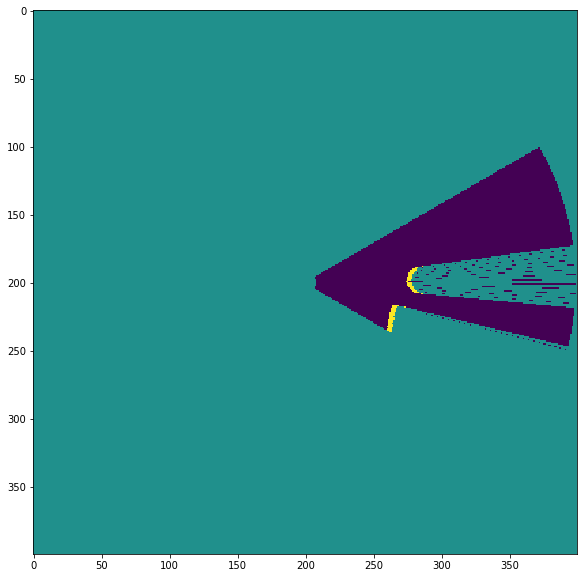

In [199]:
laserscan = ranges2cart(ranges, range_min, range_max, angle_min, angle_increment)
plt.imshow(laserscan)

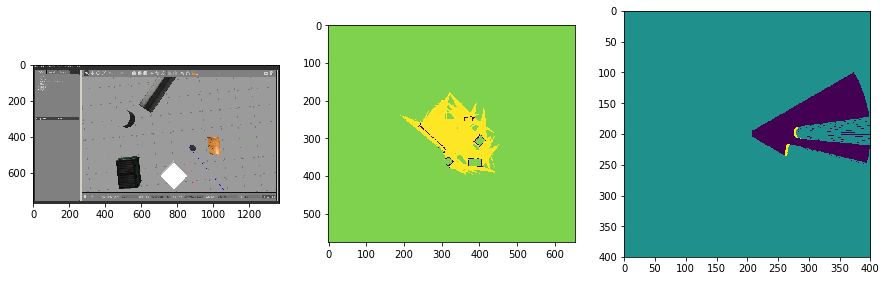

In [240]:
screenshot = cv2.cvtColor(cv2.imread('Screenshot.png'), cv2.COLOR_BGR2RGB)
map2 = cv2.cvtColor(cv2.imread('map2.pgm'), cv2.COLOR_BGR2RGB)[:,:,0]
map2 = cv2.resize(map2,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_NEAREST)
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(screenshot)
axarr[1].imshow(map2)
axarr[2].imshow(laserscan)
fig.set_size_inches((15,5))

In [277]:
map3 = map2.astype(float)

In [278]:
set(map2.flatten())

{0, 205, 254}

In [279]:
map3[map2==0]=1
map3[map2==205]=0
map3[map2==254]=-1
map3.shape, set(map3.flat)

((576, 653), {-1.0, 0.0, 1.0})

In [280]:
rows,cols = laserscan.shape

In [295]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),240,1)

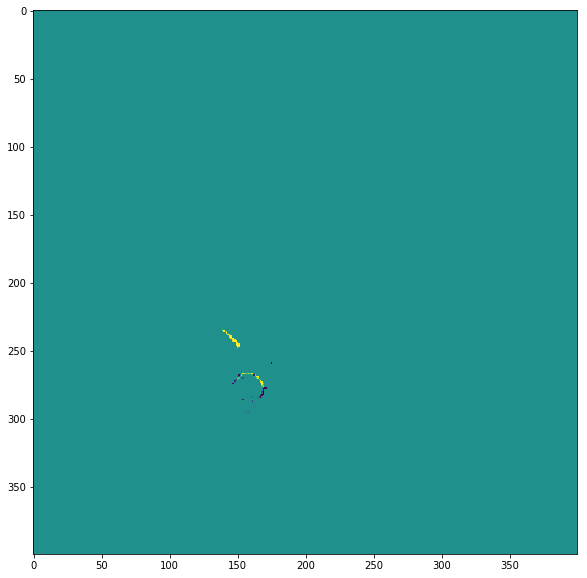

In [306]:
map4 = map3.copy()
map4 = map4[85:,160:][:400,:400]
map4[map4<0]=0 # mapa apenas com obstaculos
map4*=cv2.warpAffine(laserscan,M,(cols,rows))
plt.imshow(map4)

In [307]:
def trypos(worldmap, localmap, pos, rot):
    rows,cols = localmap.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1)
    map4 = map3.copy()
    map4 = map4[pos[0]:,pos[1]:][:localmap.shape[0],:localmap.shape[1]]
    map4[map4<0]=0 # mapa apenas com obstaculos
    map4*=cv2.warpAffine(laserscan,M,(cols,rows))
    return sum(map4.flat)

In [ ]:
rng = np.random.RandomState(10)

In [315]:
rng.normal()

-1.5454002921112682

In [323]:
np.random.normal(10)

8.514424982770853

In [328]:
result = np.ones((10,))
for i in range(10):
    x = np.random.normal(3)
    y = np.random.normal(3)
    alpha = np.random.normal()
    result[i] = trypos(map3, laserscan,(int(85), int(160)), 240+alpha)

1

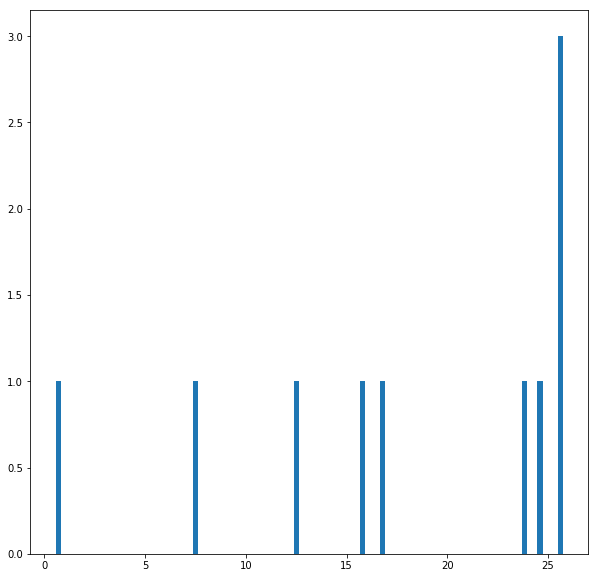

In [331]:
plt.hist(result,bins=100)
1